In [0]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
pd.options.display.max_colwidth=200;
%matplotlib inline 

In [0]:
df = pd.read_csv('Headphone_Repository.csv')

In [0]:
df.head()

,Product Name,Price,Review
0,Bowers & Wilkins PX,$299.99,"I spent a good couple weeks with these headphones and tried very hard to like them. They look and feel phenomenal to touch, and have all of the latest tech and smart features. Bluetooth connection..."
1,Bowers & Wilkins PX,$299.99,"I have been touting these headphones as best in class for the past year. To me, the build quality on them is one of their shining qualities, along with stunning sound at a nice price point. I am a..."
2,Bowers & Wilkins PX,$299.99,"I am sorry not to give these headphones a five-star review; on sound alone, they are superb, and the download of updates and the app both worked perfectly. I am a classical music person, and I hav..."
3,Bowers & Wilkins PX,$299.99,"I intended these to be my everyday headphones, as I bike to work, and find myself often in airplanes. The sound is great, but a few months after purchasing them — and enjoying their great sound — ..."
4,Bowers & Wilkins PX,$299.99,"I’ve had these headphones for about 4 months. I wear them to commute to work every day, and have used them on airplanes during 2 cross-country roundtrip flights. I have to say, prior to purchase I..."


In [0]:
Headphones=df.iloc[:,0]

In [0]:
Headphones

0      Bowers & Wilkins PX
1      Bowers & Wilkins PX
2      Bowers & Wilkins PX
3      Bowers & Wilkins PX
4      Bowers & Wilkins PX
              ...         
194         Sony WH1000XM3
195         Sony WH1000XM3
196         Sony WH1000XM3
197         Sony WH1000XM3
198         Sony WH1000XM3
Name: Product Name, Length: 199, dtype: object

In [0]:
Reviews=df.iloc[:,2]

In [0]:
Reviews

0      I spent a good couple weeks with these headphones and tried very hard to like them. They look and feel phenomenal to touch, and have all of the latest tech and smart features. Bluetooth connection...
1      I have been touting these headphones as best in class for the past year. To me, the build quality on them is one of their shining qualities, along with stunning sound at a nice price point. I am a...
2      I am sorry not to give these headphones a five-star review; on sound alone, they are superb, and the download of updates and the app both worked perfectly. I am a classical music person, and I hav...
3      I intended these to be my everyday headphones, as I bike to work, and find myself often in airplanes. The sound is great, but a few months after purchasing them — and enjoying their great sound — ...
4      I’ve had these headphones for about 4 months. I wear them to commute to work every day, and have used them on airplanes during 2 cross-country roundtrip flights. I h

In [0]:
corpus_df=pd.DataFrame({'Headphones':Headphones,'Review':Reviews})

In [0]:
corpus_df=corpus_df[['Headphones','Review']]
corpus_df.head()

,Headphones,Review
0,Bowers & Wilkins PX,"I spent a good couple weeks with these headphones and tried very hard to like them. They look and feel phenomenal to touch, and have all of the latest tech and smart features. Bluetooth connection..."
1,Bowers & Wilkins PX,"I have been touting these headphones as best in class for the past year. To me, the build quality on them is one of their shining qualities, along with stunning sound at a nice price point. I am a..."
2,Bowers & Wilkins PX,"I am sorry not to give these headphones a five-star review; on sound alone, they are superb, and the download of updates and the app both worked perfectly. I am a classical music person, and I hav..."
3,Bowers & Wilkins PX,"I intended these to be my everyday headphones, as I bike to work, and find myself often in airplanes. The sound is great, but a few months after purchasing them — and enjoying their great sound — ..."
4,Bowers & Wilkins PX,"I’ve had these headphones for about 4 months. I wear them to commute to work every day, and have used them on airplanes during 2 cross-country roundtrip flights. I have to say, prior to purchase I..."


In [0]:
corpus=np.array(Reviews)
corpus

array(['I spent a good couple weeks with these headphones and tried very hard to like them. They look and feel phenomenal to touch, and have all of the latest tech and smart features. Bluetooth connection was strong and problem-free, and the wear sensors seem to work exactly as advertised. Being able to turn off / adjust noise canceling is a welcome feature. USB-C charging is awesome. However, there were a few deal breakers that have pushed me to return them.\n\n-Uncomfortable to wear. The ear cushions are more like thin rims around the earcups, and the clamping pressure is high, so they really dig into your skin. Additionally, a pressure point/hotspot begins to develop at the very top of your head where all of the weight seems to be centered. No amount of break-in brought these to an acceptable level. The headphones are some of the heaviest in their class, and so it makes it very difficult to have multi-hour listening sessions.\n\n-A significantly more "neutral" sound than earlier B&W

In [0]:
#Normalize and Preprocessing Text Corpus
wpt=nltk.WordPunctTokenizer()
stop_words=nltk.corpus.stopwords.words('english')

In [0]:
def normalize_document (doc):
    #lowercase and remove special characters\whitespace
    doc=re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A) #re.I ignore case sensitive, ASCII-only matching
    doc=doc.lower()
    doc=doc.strip()
    doc=re.sub(r'\s+[a-z]\s+',' ', doc) #remove single chracaters
    doc=re.sub(r'^[a-z]\s+',' ', doc) #remove single chracaters at the start of sentences
    doc=re.sub(r'\s+',' ', doc) #remove extra spaces
    doc = re.sub(r'\W', ' ',str(doc)) #remove all non-word characters, punctuations, ASCII signs
    #tokenize document
    tokens=wpt.tokenize(doc)
    #filter stopwords out of document
    filtered_tokens=[token for token in tokens if token not in stop_words]
    #re-create documenr from filtered tokens
    doc=' '.join(filtered_tokens)
    return doc

In [0]:
normalize_corpus=np.vectorize(normalize_document) 

In [0]:
norm_corpus=normalize_corpus(corpus)
norm_corpus

array(['spent good couple weeks headphones tried hard like look feel phenomenal touch latest tech smart features bluetooth connection strong problemfree wear sensors seem work exactly advertised able turn adjust noise canceling welcome feature usbc charging awesome however deal breakers pushed return uncomfortable wear ear cushions like thin rims around earcups clamping pressure high really dig skin additionally pressure pointhotspot begins develop top head weight seems centered amount breakin brought acceptable level headphones heaviest class makes difficult multihour listening sessions significantly neutral sound earlier bw products dont much warm bassy vshaped sound signature earlier headphones like wireless depending music preferences could good bad thing since music generally hip hop rb con passive listening support cannot connect standard aux cable play like typical wired headset must powered means replace battery point line bw doesnt give information battery replacement costs lo

In [0]:
#To create TF-IDF Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0.2, max_df=0.8) #parameters

In [0]:
cv_matrix=cv.fit_transform(norm_corpus)
cv_matrix

<199x43 sparse matrix of type '<class 'numpy.int64'>'
	with 2662 stored elements in Compressed Sparse Row format>

In [0]:
print(cv_matrix)

  (0, 14)	2
  (0, 17)	3
  (0, 23)	4
  (0, 4)	1
  (0, 39)	2
  (0, 41)	1
  (0, 28)	1
  (0, 10)	1
  (0, 34)	1
  (0, 16)	1
  (0, 35)	2
  (0, 9)	1
  (0, 25)	1
  (0, 26)	2
  (0, 2)	2
  (0, 24)	1
  (0, 29)	1
  (1, 17)	2
  (1, 10)	2
  (1, 35)	1
  (1, 25)	2
  (1, 29)	1
  (1, 33)	2
  (1, 27)	1
  (1, 32)	1
  :	:
  (197, 9)	2
  (197, 26)	1
  (197, 33)	1
  (197, 38)	1
  (197, 3)	1
  (197, 20)	1
  (197, 13)	1
  (197, 37)	1
  (197, 5)	3
  (197, 36)	1
  (198, 17)	2
  (198, 23)	1
  (198, 41)	1
  (198, 10)	1
  (198, 34)	3
  (198, 24)	1
  (198, 33)	1
  (198, 40)	1
  (198, 1)	1
  (198, 12)	2
  (198, 15)	1
  (198, 21)	2
  (198, 20)	1
  (198, 8)	1
  (198, 42)	1


In [0]:
cv_matrix=cv_matrix.toarray()
cv_matrix

array([[0, 0, 2, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 2, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 1]])

In [0]:
#get all unique words in the corpus
vocab=cv.get_feature_names()
#show document feature matrix
pd.DataFrame(cv_matrix,columns=vocab)
pd

<module 'pandas' from '/usr/local/lib/python3.6/dist-packages/pandas/__init__.py'>

In [0]:
#Document Clustering with Similarity Features
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
#you can set the n-gram range to 1,2 to get unique unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(5,5))
bv_matrix=bv.fit_transform(norm_corpus)
bv_matrix=bv_matrix.toarray()
vocab=bv.get_feature_names()
pd.DataFrame(bv_matrix,columns=vocab)

,aaas quick change still happy,ability make app user friendly,ability plug straight active noise,ability set favorite noise canceling,ability tweak noise cancelling maximize,abilityit fantastic even button separate,able ask phone simple verbal,able awareness listening audio situations,able cancel gym noises well,able charge via usbc plus,able connect fine factory reset,able cup right headphone pause,able find old soft headphone,able get contact sony replaced,able get little hours battery,able hear defined soundfield felt,able hear frequencies hzkhz clearly,able help remedy build quality,able leave phone nd level,able listen gentile meditation relaxation,able listen music public lower,able lock signals clearly devices,able pair ipad listened two,able place back right away,able play iphone voice memos,able run dead seems would,able set quickly bose customer,able still hear voices little,able stop music time came,able take minivacation everyday life,able talk phone ive tried,able test tracking headphones nearly,able tune fm radio stations,able turn adjust noise canceling,able turn headphones properly actually,able use sony apps build,able work pleasant way work,ableton laptop wasnt bothered much,ableton live laptop session never,abroad prague im nervous traveler,...,youd put volume buttons headphones,youd rather blend sound quality,youd think money youre spending,youll need read instructions get,younger folks might think sound,youre age care less coolness,youre audiophile love hearing music,youre basshead definitely like neutral,youre eyeing bose sound subjective,youre familiar qciis bose connect,youre going get sound headphones,youre going travelpack overall really,youre good music quality spend,youre hear source transmitted audio,youre listening doesnt really matter,youre listening pop headphones people,youre spending would give hard,youre taking break battery life,youre wearing anything charge really,youre world music concert amazingly,youtube battery done recharged similar,youtube battery life superb got,youtube bought two pair one,youtube decided exchange yes wow,youtube listening via bluetooth sd,youtube netflix theres slight delay,youtube reviews headphones decided order,youtube warned sound quality im,youve got know true evaluation,yrs vast knowledge recorded music,yup questioning thinks hours battery,zero discomfort dont clamp onto,zero issues past couple months,zero problems would buy sound,zero stars audio fair best,zik vmoda crossfade crossfade wireless,zippered semi hard pouch use,zipup case plus store charging,zn etc positive reviews headphones,zoom meeting worked well listening
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [0]:
df = pd.DataFrame(vocab)
df.to_csv('TrigramsV.csv',header=True, index=False)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tt=TfidfTransformer(norm='l2', use_idf=True)
tt_mtarix=tt.fit_transform(cv_matrix)
tt_mtarix=tt_mtarix.toarray()
vocab=cv.get_feature_names()
pd.DataFrame(np.round(tt_mtarix,2), columns=vocab)


,also,bass,battery,better,bluetooth,bose,cancelling,case,comfortable,dont,ear,ears,even,get,good,great,head,headphones,hear,hours,im,ive,life,like,little,much,music,nice,noise,one,pair,phone,price,quality,really,sound,still,time,use,wear,well,work,would
0,0.00,0.00,0.3,0.00,0.16,0.00,0.00,0.00,0.00,0.15,0.17,0.0,0.00,0.00,0.24,0.00,0.17,0.27,0.00,0.00,0.00,0.00,0.00,0.52,0.18,0.16,0.28,0.00,0.11,0.17,0.00,0.0,0.0,0.00,0.15,0.19,0.00,0.0,0.00,0.36,0.00,0.17,0.00
1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.46,0.00,0.00,0.46,0.0,0.00,0.00,0.00,0.00,0.00,0.24,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.42,0.00,0.23,0.00,0.23,0.00,0.0,0.2,0.30,0.00,0.13,0.00,0.0,0.20,0.00,0.00,0.00,0.00
2,0.00,0.21,0.0,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.0,0.21,0.00,0.15,0.00,0.42,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.00,0.0,0.0,0.14,0.00,0.46,0.00,0.0,0.00,0.22,0.34,0.00,0.00
3,0.30,0.00,0.0,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.24,0.50,0.00,0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.34,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.38,0.00,0.0,0.00,0.00,0.00,0.33,0.00
4,0.17,0.00,0.0,0.00,0.00,0.00,0.20,0.00,0.16,0.17,0.00,0.0,0.19,0.00,0.00,0.42,0.19,0.21,0.00,0.00,0.51,0.19,0.00,0.00,0.00,0.00,0.32,0.00,0.25,0.00,0.00,0.0,0.0,0.13,0.00,0.11,0.00,0.0,0.17,0.20,0.00,0.19,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.00,0.21,0.0,0.43,0.00,0.00,0.00,0.00,0.34,0.00,0.21,0.0,0.20,0.00,0.15,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.19,0.17,0.00,0.27,0.00,0.00,0.0,0.0,0.28,0.00,0.35,0.00,0.0,0.36,0.00,0.00,0.00,0.00
195,0.00,0.00,0.0,0.00,0.55,0.00,0.00,0.30,0.00,0.00,0.00,0.0,0.29,0.00,0.21,0.00,0.00,0.00,0.00,0.00,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.0,0.0,0.20,0.00,0.32,0.00,0.0,0.00,0.00,0.00,0.00,0.00
196,0.00,0.00,0.2,0.00,0.00,0.00,0.47,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0.22,0.00,0.00,0.23,0.17,0.00,0.00,0.19,0.00,0.44,0.00,0.42,0.0,0.0,0.15,0.00,0.00,0.00,0.0,0.00,0.24,0.00,0.00,0.00
197,0.00,0.00,0.0,0.20,0.37,0.59,0.00,0.00,0.00,0.35,0.00,0.0,0.00,0.17,0.00,0.00,0.00,0.11,0.00,0.00,0.17,0.00,0.00,0.30,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.0,0.0,0.13,0.00,0.22,0.19,0.2,0.17,0.00,0.00,0.00,0.00


In [0]:
#Calculate TF-IDF for raw data, using TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tv=TfidfVectorizer (min_df=0.2, max_df=0.8, norm='l2', 
                    #max_df ignore terms that appear in more than x% of the documents, 1 means ignore nothing!
                    #min_df ignore terms that appear in less than x% of the documents 
                  use_idf=True, smooth_idf=True)
tv_matrix=tv.fit_transform(norm_corpus)
tv_matrix=tv_matrix.toarray()
vocab=tv.get_feature_names()
pd.DataFrame (np.round(tv_matrix,2), columns=vocab)

,also,bass,battery,better,bluetooth,bose,cancelling,case,comfortable,dont,ear,ears,even,get,good,great,head,headphones,hear,hours,im,ive,life,like,little,much,music,nice,noise,one,pair,phone,price,quality,really,sound,still,time,use,wear,well,work,would
0,0.00,0.00,0.3,0.00,0.16,0.00,0.00,0.00,0.00,0.15,0.17,0.0,0.00,0.00,0.24,0.00,0.17,0.27,0.00,0.00,0.00,0.00,0.00,0.52,0.18,0.16,0.28,0.00,0.11,0.17,0.00,0.0,0.0,0.00,0.15,0.19,0.00,0.0,0.00,0.36,0.00,0.17,0.00
1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.46,0.00,0.00,0.46,0.0,0.00,0.00,0.00,0.00,0.00,0.24,0.23,0.00,0.00,0.00,0.00,0.00,0.00,0.42,0.00,0.23,0.00,0.23,0.00,0.0,0.2,0.30,0.00,0.13,0.00,0.0,0.20,0.00,0.00,0.00,0.00
2,0.00,0.21,0.0,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.0,0.21,0.00,0.15,0.00,0.42,0.22,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.00,0.00,0.00,0.00,0.0,0.0,0.14,0.00,0.46,0.00,0.0,0.00,0.22,0.34,0.00,0.00
3,0.30,0.00,0.0,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.24,0.50,0.00,0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.34,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.38,0.00,0.0,0.00,0.00,0.00,0.33,0.00
4,0.17,0.00,0.0,0.00,0.00,0.00,0.20,0.00,0.16,0.17,0.00,0.0,0.19,0.00,0.00,0.42,0.19,0.21,0.00,0.00,0.51,0.19,0.00,0.00,0.00,0.00,0.32,0.00,0.25,0.00,0.00,0.0,0.0,0.13,0.00,0.11,0.00,0.0,0.17,0.20,0.00,0.19,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.00,0.21,0.0,0.43,0.00,0.00,0.00,0.00,0.34,0.00,0.21,0.0,0.20,0.00,0.15,0.00,0.00,0.22,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.19,0.17,0.00,0.27,0.00,0.00,0.0,0.0,0.28,0.00,0.35,0.00,0.0,0.36,0.00,0.00,0.00,0.00
195,0.00,0.00,0.0,0.00,0.55,0.00,0.00,0.30,0.00,0.00,0.00,0.0,0.29,0.00,0.21,0.00,0.00,0.00,0.00,0.00,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.0,0.0,0.20,0.00,0.32,0.00,0.0,0.00,0.00,0.00,0.00,0.00
196,0.00,0.00,0.2,0.00,0.00,0.00,0.47,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0.22,0.00,0.00,0.23,0.17,0.00,0.00,0.19,0.00,0.44,0.00,0.42,0.0,0.0,0.15,0.00,0.00,0.00,0.0,0.00,0.24,0.00,0.00,0.00
197,0.00,0.00,0.0,0.20,0.37,0.59,0.00,0.00,0.00,0.35,0.00,0.0,0.00,0.17,0.00,0.00,0.00,0.11,0.00,0.00,0.17,0.00,0.00,0.30,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.0,0.0,0.13,0.00,0.22,0.19,0.2,0.17,0.00,0.00,0.00,0.00


In [0]:
from sklearn.metrics.pairwise import cosine_similarity 
#Cosine of angle between feature vector representations of two text documents
#the smaller the angle between documents, the more similar they are

In [0]:
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
0,1.000000,0.274987,0.422553,0.338548,0.358361,0.447636,0.663392,0.145890,0.501894,0.159795,0.453487,0.441617,0.447077,0.438224,0.426390,0.391820,0.367496,0.265836,0.091463,0.498278,0.537889,0.397165,0.245579,0.585716,0.416223,0.349727,0.305160,0.333210,0.363049,0.509978,0.230840,0.261277,0.225495,0.330689,0.333017,0.376516,0.335123,0.395156,0.298394,0.460541,...,0.304476,0.254665,0.275537,0.237523,0.058450,0.162960,0.276562,0.253720,0.324777,0.397211,0.000000,0.233508,0.368032,0.329002,0.408665,0.216693,0.312543,0.200383,0.218628,0.655418,0.191402,0.317977,0.304355,0.327475,0.276860,0.375189,0.224128,0.256491,0.184049,0.356946,0.147087,0.124051,0.235070,0.323800,0.263177,0.391056,0.201506,0.435669,0.384327,0.325541
1,0.274987,1.000000,0.252344,0.212905,0.135357,0.282654,0.363610,0.126551,0.490503,0.067472,0.522780,0.062018,0.156648,0.155608,0.245920,0.179346,0.212409,0.209795,0.298550,0.491896,0.289013,0.179750,0.152253,0.230799,0.218567,0.125148,0.489547,0.197851,0.143268,0.248388,0.107603,0.289764,0.174378,0.221559,0.253971,0.153960,0.474476,0.219132,0.098176,0.246708,...,0.175334,0.078607,0.259293,0.511004,0.000000,0.263139,0.216908,0.275791,0.298263,0.330171,0.145413,0.297155,0.309422,0.330937,0.512227,0.207213,0.292072,0.312535,0.284483,0.366384,0.189998,0.198774,0.064352,0.288352,0.368814,0.242999,0.097772,0.294676,0.297482,0.237033,0.163080,0.096912,0.453576,0.211557,0.160311,0.429415,0.238063,0.132794,0.126639,0.189013
2,0.422553,0.252344,1.000000,0.294271,0.332347,0.547919,0.384185,0.089681,0.532452,0.062293,0.553381,0.372421,0.287295,0.229078,0.451997,0.298260,0.232754,0.188566,0.074566,0.419156,0.341026,0.212674,0.218163,0.549841,0.485710,0.217221,0.187812,0.103553,0.347166,0.346699,0.347317,0.104255,0.224692,0.345495,0.350940,0.280868,0.430511,0.287081,0.184807,0.543002,...,0.161876,0.000000,0.189507,0.403482,0.220640,0.053375,0.292783,0.336004,0.281240,0.380663,0.000000,0.422932,0.589017,0.204222,0.289998,0.256426,0.241321,0.299479,0.419176,0.351726,0.156863,0.266284,0.412032,0.107057,0.330681,0.505681,0.323847,0.392138,0.434854,0.368684,0.488181,0.343742,0.178197,0.253610,0.032862,0.620477,0.268495,0.186184,0.260460,0.296739
3,0.338548,0.212905,0.294271,1.000000,0.435284,0.541309,0.249193,0.101651,0.290852,0.268066,0.347254,0.246397,0.282500,0.257885,0.166373,0.400680,0.199528,0.585484,0.282140,0.315162,0.323757,0.158719,0.355119,0.424164,0.360527,0.456977,0.139333,0.000000,0.176317,0.191958,0.076160,0.483020,0.254385,0.222439,0.283002,0.314723,0.201491,0.350558,0.236090,0.334711,...,0.408314,0.245337,0.554399,0.286491,0.281877,0.552511,0.364966,0.404756,0.571142,0.434195,0.226731,0.399813,0.426615,0.188622,0.181950,0.394461,0.462656,0.192301,0.467232,0.362671,0.224452,0.359393,0.593533,0.478876,0.223385,0.343937,0.117468,0.174422,0.275786,0.292144,0.121506,0.294707,0.209115,0.114540,0.053629,0.248252,0.351846,0.131555,0.241323,0.219011
4,0.358361,0.135357,0.332347,0.435284,1.000000,0.399213,0.377358,0.103306,0.400946,0.474228,0.262406,0.429901,0.419017,0.457403,0.402501,0.149986,0.396639,0.469758,0.249128,0.326504,0.526057,0.292439,0.402615,0.570482,0.314002,0.581461,0.214369,0.477452,0.405886,0.310964,0.418365,0.377187,0.375898,0.330514,0.431903,0.151931,0.210340,0.345518,0.312558,0.258172,...,0.305519,0.394502,0.361560,0.253778,0.369310,0.314016,0.392298,0.259729,0.404328,0.401169,0.191434,0.210492,0.448893,0.354715,0.411104,0.329734,0.280686,0.109973,0.405105,0.367986,0.397543,0.271375,0.236802,0.381667,0.219019,0.444420,0.245124,0.244992,0.271876,0.528306,0.138016,0.525217,0.163687,0.229858,0.303654,0.396753,0.372918,0.406471,0.288027,0.428472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
from sklearn.metrics.pairwise import euclidean_distances
similarity_matrix_ed = euclidean_distances(tv_matrix)
similarity_df_ed = pd.DataFrame(similarity_matrix_ed)
similarity_df_ed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198
0,0.000000,1.204170,1.074660,1.150175,1.132818,1.051060,0.820498,1.306989,0.998105,1.296307,1.045479,1.056771,1.051592,1.059978,1.071084,1.102887,1.124726,1.211746,1.347989,1.001721,0.961365,1.098030,1.228349,0.910257,1.080534,1.140415,1.178847,1.154807,1.128673,0.989972,1.240290,1.215502,1.244593,1.156988,1.154974,1.116677,1.153150,1.099858,1.184573,1.038710,...,1.179427,1.220930,1.203713,1.234890,1.372261,1.293863,1.202862,1.221704,1.162087,1.097988,1.414214,1.238137,1.124249,1.158445,1.087507,1.251645,1.172568,1.264608,1.250098,0.830159,1.271690,1.167924,1.179529,1.159763,1.202614,1.117865,1.245690,1.219433,1.277459,1.134067,1.306073,1.323593,1.236875,1.162927,1.213938,1.103579,1.263720,1.062385,1.109660,1.161429
1,1.204170,0.000000,1.222829,1.254667,1.315023,1.197786,1.128175,1.321703,1.009452,1.365671,0.976955,1.369659,1.298731,1.299532,1.228072,1.281135,1.255063,1.257144,1.184441,1.008072,1.192465,1.280820,1.302111,1.240324,1.250146,1.322764,1.010399,1.266609,1.308993,1.226060,1.335962,1.191836,1.285007,1.247750,1.221498,1.300799,1.025206,1.249694,1.343000,1.227430,...,1.284263,1.357492,1.217134,0.988935,1.414214,1.213970,1.251473,1.203503,1.184683,1.157436,1.307354,1.185618,1.175226,1.156774,0.987697,1.259196,1.189897,1.172574,1.196258,1.125714,1.272794,1.265880,1.367953,1.193019,1.123553,1.230448,1.343301,1.187707,1.185342,1.235287,1.293770,1.343940,1.045394,1.255741,1.295908,1.068256,1.234453,1.316971,1.321636,1.273567
2,1.074660,1.222829,0.000000,1.188048,1.155554,0.950874,1.109789,1.349310,0.967004,1.369458,0.945113,1.120339,1.193905,1.241710,1.046903,1.184686,1.238746,1.273918,1.360466,1.077816,1.148019,1.254851,1.250469,0.948851,1.014189,1.251223,1.274510,1.338990,1.142658,1.143067,1.142526,1.338465,1.245237,1.144119,1.139351,1.199276,1.067229,1.194084,1.276866,0.956031,...,1.294700,1.414214,1.273180,1.092262,1.248487,1.375954,1.189300,1.152386,1.198966,1.112957,1.414214,1.074307,0.906624,1.261569,1.191640,1.219487,1.231811,1.183656,1.077798,1.138660,1.298566,1.211376,1.084406,1.336370,1.156996,0.994303,1.162887,1.102598,1.063152,1.123669,1.011750,1.145651,1.282032,1.221794,1.390782,0.871233,1.209550,1.275787,1.216174,1.185969
3,1.150175,1.254667,1.188048,0.000000,1.062747,0.957801,1.225404,1.340410,1.190923,1.209904,1.142581,1.227683,1.197915,1.218290,1.291222,1.094824,1.265284,0.910512,1.198215,1.170332,1.162964,1.297136,1.135677,1.073160,1.130905,1.042135,1.311996,1.414214,1.283497,1.271253,1.359294,1.016838,1.221160,1.247046,1.197496,1.170707,1.263732,1.139686,1.236050,1.153507,...,1.087829,1.228546,0.944035,1.194579,1.198435,0.946033,1.126973,1.091095,0.926129,1.063772,1.243599,1.095616,1.070873,1.273875,1.279102,1.100490,1.036672,1.270983,1.032248,1.129007,1.245430,1.131907,0.901628,1.020906,1.246287,1.145480,1.328557,1.284973,1.203507,1.189837,1.325515,1.187681,1.257684,1.330760,1.375770,1.226171,1.138555,1.317912,1.231809,1.249791
4,1.132818,1.315023,1.155554,1.062747,0.000000,1.096163,1.115923,1.339174,1.094581,1.025448,1.214573,1.067800,1.077946,1.041727,1.093160,1.303851,1.098509,1.029798,1.225457,1.160600,0.973595,1.189589,1.093055,0.926842,1.171322,0.914919,1.253500,1.022300,1.090059,1.173913,1.078550,1.116076,1.117230,1.157139,1.065924,1.302359,1.256710,1.144100,1.172554,1.218054,...,1.178542,1.100452,1.129991,1.221656,1.123112,1.171310,1.102454,1.216776,1.091487,1.094377,1.271665,1.256589,1.049864,1.136033,1.085261,1.157813,1.199429,1.334187,1.090775,1.124290,1.097686,1.207166,1.235474,1.112055,1.249785,1.054116,1.228720,1.228827,1.206751,0.971282,1.313000,0.974456,1.293300,1.241082,1.180124,1.098405,1.119895,1.089522,1.193292,1.069138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [0]:
#Document Clustering with Similarity Features
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
Z = linkage (similarity_matrix, 'ward')
Z

array([[ 41.        ,  45.        ,   1.14588021,   2.        ],
       [ 34.        , 179.        ,   1.17722784,   2.        ],
       [ 58.        , 163.        ,   1.27832687,   2.        ],
       [ 85.        , 161.        ,   1.31505011,   2.        ],
       [  5.        , 146.        ,   1.33843904,   2.        ],
       [149.        , 188.        ,   1.371209  ,   2.        ],
       [ 23.        , 171.        ,   1.38035253,   2.        ],
       [ 47.        , 172.        ,   1.41238031,   2.        ],
       [ 73.        , 155.        ,   1.41432593,   2.        ],
       [ 31.        , 175.        ,   1.42200926,   2.        ],
       [ 49.        , 110.        ,   1.43271687,   2.        ],
       [ 68.        ,  75.        ,   1.4377158 ,   2.        ],
       [  6.        , 137.        ,   1.44382718,   2.        ],
       [ 19.        ,  33.        ,   1.44783015,   2.        ],
       [ 20.        , 140.        ,   1.46936429,   2.        ],
       [ 90.        , 156

In [0]:
pd.DataFrame(Z, columns=['Documents\Cluster 1','Documents\Cluster 2',
                        'Distance', 'Cluster Size'], dtype='object')
#ward minimizes the variance of the clusters being merged.

,Documents\Cluster 1,Documents\Cluster 2,Distance,Cluster Size
0,41,45,1.14588,2
1,34,179,1.17723,2
2,58,163,1.27833,2
3,85,161,1.31505,2
4,5,146,1.33844,2
...,...,...,...,...
193,388,390,6.18764,76
194,387,389,6.59025,55
195,383,391,7.62142,68
196,392,394,8.39883,144


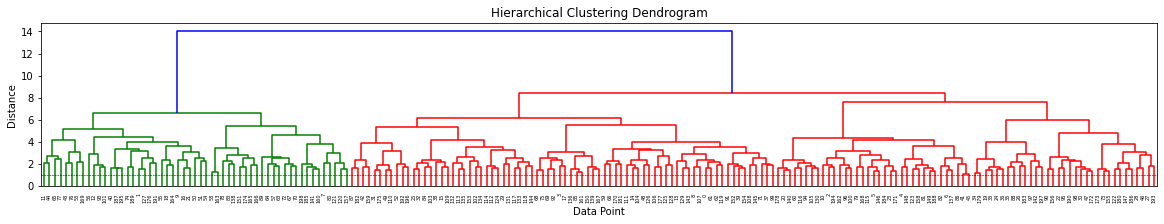

In [0]:
#Let's visualize the dendrogram
plt.figure(figsize = (20,3))
plt.title ('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0,c='k',ls='--',lw=0.5);

In [0]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0

cluster_lables = fcluster(Z,max_dist, criterion='distance')
cluster_lables = pd.DataFrame(cluster_lables,columns=['ClusterLabel'])
pd.concat([corpus_df,cluster_lables],axis=1)

,Headphones,Review,ClusterLabel
0,Bowers & Wilkins PX,"I spent a good couple weeks with these headphones and tried very hard to like them. They look and feel phenomenal to touch, and have all of the latest tech and smart features. Bluetooth connection...",119
1,Bowers & Wilkins PX,"I have been touting these headphones as best in class for the past year. To me, the build quality on them is one of their shining qualities, along with stunning sound at a nice price point. I am a...",18
2,Bowers & Wilkins PX,"I am sorry not to give these headphones a five-star review; on sound alone, they are superb, and the download of updates and the app both worked perfectly. I am a classical music person, and I hav...",140
3,Bowers & Wilkins PX,"I intended these to be my everyday headphones, as I bike to work, and find myself often in airplanes. The sound is great, but a few months after purchasing them — and enjoying their great sound — ...",93
4,Bowers & Wilkins PX,"I’ve had these headphones for about 4 months. I wear them to commute to work every day, and have used them on airplanes during 2 cross-country roundtrip flights. I have to say, prior to purchase I...",154
...,...,...,...
194,Sony WH1000XM3,"Sony WH1000XM3 Wireless Industry Leading Noise Canceling Over Ear Headphones, Silver (WH-1000XM3/S)I was the proud owner of the Sony WH1000M2 for 2 weeks. I did like them a lot. Very good sound, e...",141
195,Sony WH1000XM3,"You can pair it with multiple devices, but you cannot switch devices! Unbelievable! As Sony says, the only way is to switch off bluetooth on other devices. So, in my my case it will just connect t...",14
196,Sony WH1000XM3,"These are my first pair of noise cancelling headphones, I have started travelling more and needed something to keep my sanity. Within the 1st eight days of ownership, I used them for over 60 hours...",65
197,Sony WH1000XM3,Once you get it hooked to music or an app or game and HAVE sound(doing that is the tough part) you will like the quality. There are a lot of problems that need to be addressed though. Pairing went...,178


In [0]:
list_corpus = norm_corpus.tolist()

In [0]:
vectorizer = TfidfVectorizer ()
X = vectorizer.fit_transform (list_corpus)

In [0]:
from sklearn.decomposition import TruncatedSVD

In [0]:
#Now we are going to de-compose the Tfid matrix into three matrices
lsa = TruncatedSVD (n_components=4, n_iter=100)#n_com nmber of concepts we want to find
lsa.fit(X)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=100,
             random_state=None, tol=0.0)

In [0]:
terms = vectorizer.get_feature_names()
terms[:5]

['aaas', 'ability', 'abilityit', 'able', 'ableton']

In [0]:
for i,comp in enumerate(lsa.components_):#enumerate return index and row, a list of tuples
    componentTerms = zip(terms,comp) #we use zip to combine values and terms
    #sort component terms, by concept value,lambda x (x correpsnding tuples) and X[1] the value
    sortedTerms = sorted(componentTerms, key=lambda x:x[1], reverse=True) #decending order
    sortedTerms = sortedTerms[:10] #select 10 most imp. terms in a specific concept
    print ("\nConcept",i,":")
    for term in sortedTerms:
        print (term)


Concept 0 :
('headphones', 0.28079058504862153)
('sound', 0.2216740411715343)
('noise', 0.19151981966797216)
('good', 0.15247647162660669)
('great', 0.15044748123075108)
('quality', 0.14592459067034635)
('like', 0.13362260345438592)
('really', 0.11785635409304428)
('music', 0.11244496655359369)
('cancelling', 0.10995877825494721)

Concept 1 :
('anc', 0.3410072975329311)
('noise', 0.30409097362450543)
('cancelling', 0.2798997089458677)
('bose', 0.1468332798626989)
('headphones', 0.1416131349651225)
('reviews', 0.11363477348271038)
('sound', 0.09860536508532643)
('quality', 0.09695722540044092)
('bass', 0.08028672183385056)
('app', 0.07638779487761005)

Concept 2 :
('bose', 0.2746018646021698)
('app', 0.14515452583993407)
('sony', 0.1313886817622136)
('bluetooth', 0.11338961987906684)
('work', 0.08524904876656235)
('call', 0.08370967132878103)
('reviews', 0.08324142418871934)
('music', 0.0791294688929249)
('two', 0.07694033537571617)
('iphone', 0.07621590108976581)

Concept 3 :
('cancel

In [0]:
concept_words = {} 

In [0]:
for i,comp in enumerate(lsa.components_):#enumerate return index and row, a list of tuples
    componentTerms = zip(terms,comp) #we use zip to combine values and terms
    #sort component terms, by concept value,lambda x (x correpsnding tuples) and X[1] the value
    sortedTerms = sorted(componentTerms, key=lambda x:x[1], reverse=True) #decending order
    sortedTerms = sortedTerms[:10] #select 10 most imp. terms in a specific concept
    concept_words["Concept " + str(i)] = sortedTerms #all concepts mapped with list of tuples

In [0]:
concept_words

{'Concept 0': [('headphones', 0.28079058504862153),
  ('sound', 0.2216740411715343),
  ('noise', 0.19151981966797216),
  ('good', 0.15247647162660669),
  ('great', 0.15044748123075108),
  ('quality', 0.14592459067034635),
  ('like', 0.13362260345438592),
  ('really', 0.11785635409304428),
  ('music', 0.11244496655359369),
  ('cancelling', 0.10995877825494721)],
 'Concept 1': [('anc', 0.3410072975329311),
  ('noise', 0.30409097362450543),
  ('cancelling', 0.2798997089458677),
  ('bose', 0.1468332798626989),
  ('headphones', 0.1416131349651225),
  ('reviews', 0.11363477348271038),
  ('sound', 0.09860536508532643),
  ('quality', 0.09695722540044092),
  ('bass', 0.08028672183385056),
  ('app', 0.07638779487761005)],
 'Concept 2': [('bose', 0.2746018646021698),
  ('app', 0.14515452583993407),
  ('sony', 0.1313886817622136),
  ('bluetooth', 0.11338961987906684),
  ('work', 0.08524904876656235),
  ('call', 0.08370967132878103),
  ('reviews', 0.08324142418871934),
  ('music', 0.079129468892924

In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
#let's now loop through all concepts and for each of them, print diff sentence scores
#based on values we will know if that sentence is in that concept or not
for key in concept_words.keys():
    sentence_scores = [] #a list to store all scores for sentences and concepts
    for sentence in list_corpus:
        words = nltk.word_tokenize(sentence)
        score = 0
        for word  in words:
            for word_with_score in concept_words[key]:
                if word  == word_with_score[0]:
                    score +=word_with_score[1]
        sentence_scores.append(score)
    print("\n"+key+":")
    for sentence_scores in sentence_scores:
        print (sentence_scores)
    


Concept 0:
2.659429301427894
1.07510439260947
1.8591233636339273
1.4583006865284207
2.098410596329456
4.941405079038724
4.25172887961557
0.11785635409304428
2.426492654931751
0.28079058504862153
1.6198388452140615
0.39323555160221524
0.470957503115167
0.7885312751774449
0.9756176249391204
1.3900308134421278
0.5024646262201559
2.7374109691382937
0.28079058504862153
6.357199754946125
5.827477022702717
1.5010476265629664
1.5258726287517765
2.2250269954663042
3.8312660260721945
1.613068500759895
1.747058795589674
0.8418046659126883
1.3532458767356141
1.5509956146850195
1.8622011844202766
1.4367737444999622
1.1081033612047322
2.870873534674069
3.6353213742964328
2.342256970823154
2.015156408505578
1.0657871266973094
1.9720806847323735
1.632779684334003
1.0290916106449035
3.5420144496141237
0.9035484709959664
0
0.26378094476339065
4.8140488752247625
1.8295704823159695
2.691192104045092
1.0576771993572984
2.1822900378471393
0.15044748123075108
0.41441318850300746
1.120699621607096
0
0.798836